#### I used a data set that looked at the GDP of the country of Brazil. Since I was looking at South America in my project, I decided to use a country from the continent to do this task.

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

In [2]:
# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [3]:
quandl.ApiConfig.api_key = 'API KEYJ'

In [4]:
data = quandl.get('BCB/8188')

In [5]:
data.head(10)

,Value
Date,
1995-01-31,6.1
1995-02-28,10.0
1995-03-31,20.6
1995-04-30,58.7
1995-05-31,35.8
1995-06-30,16.0
1995-07-31,116.5
1995-08-31,9.3
1995-09-30,13.8


### Date is already set as index column

In [6]:
#Rename Column
data.rename(columns = {'Value' : 'Investment Credit'}, inplace = True)

In [7]:
data.shape

(242, 1)

In [8]:
data.columns

Index(['Investment Credit'], dtype='object')

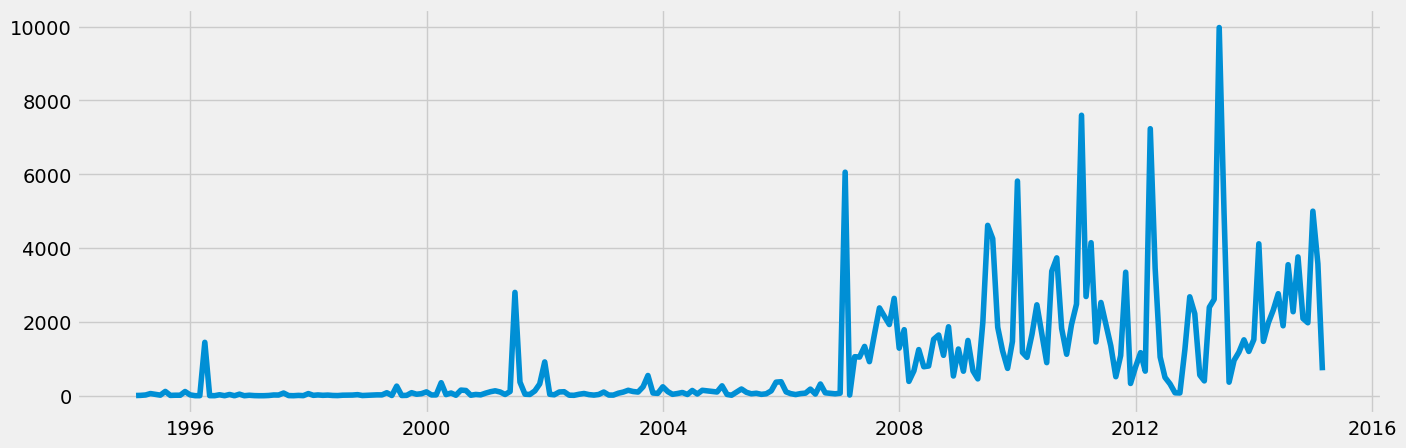

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

#### This data was cleaned before use.

## Decomposing Time-Series Data

In [12]:
decomp = sm.tsa.seasonal_decompose(data, model='additive')

In [13]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

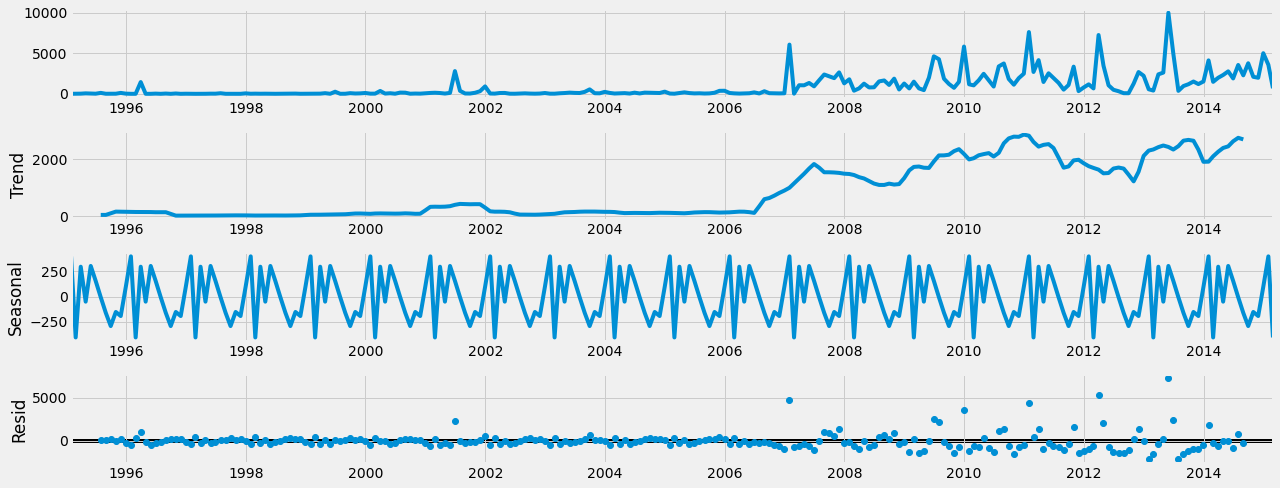

In [14]:
# Plotting decomposition of time-series data

decomp.plot()
plt.show()

### The decomposition chart shows an upward trend in Brazils GDP, although it is not a linear progression from 2007-2015.  There is a seaonality of the GDP, with it rising hsarply then dropping at the beginning of ever year, followed by two peaks in the middle of the year, then a sharp decline until the end of the year. This could have to do with the holdiays, or with harvest/production of Brazil's goods. From 2008 on there appears to be some noise due to data fluctuations.

## Stationarity Test

### Because this data has a trend, it implies that it is not stationary data.

In [138]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Investment Credit'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.271241
p-value                          0.929480
Number of Lags Used             13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


#### H0 = Presence of a unit root (non-stationary)  
#### HA = Unit root present (stationary)
#### The test statistic of-0.271241 is smaller than the critical value (5%) of -2.874302, meaning i reject the null. The result is not significant as the p-value is more than 0.05.

#### (P-value ≤ significance level/ Test statistic ≤ critical value.  If the p-value is less than or equal to the significance level or if the test statistic is less than or equal to the critical value, the decision is to reject the null hypothesis. Because the data provide evidence that the data are stationary, the recommendation of the analysis is to proceed without differencing.)(Minilab, 2021)

The result is not significant as the p-value is more than 0.05.


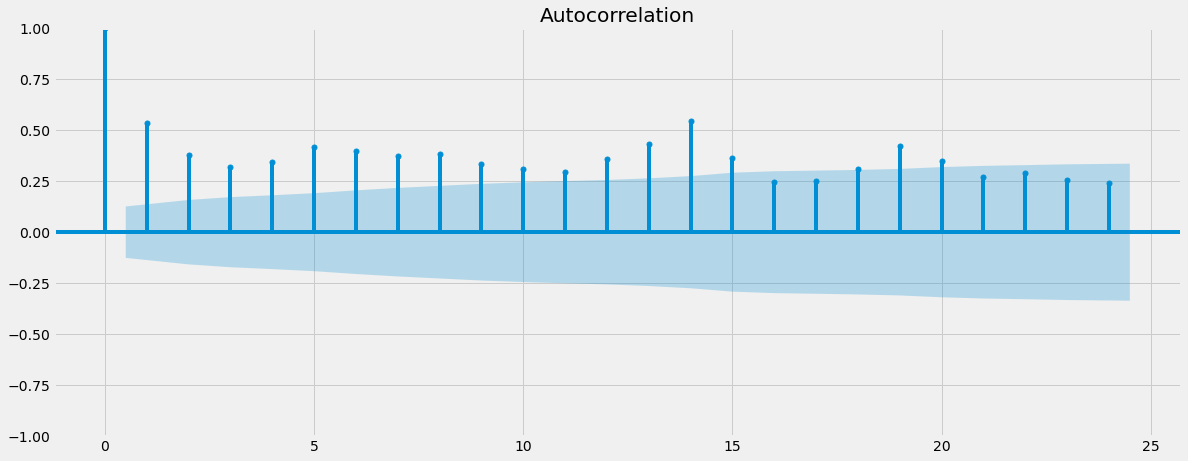

In [16]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

The blue lines extend out beyond the edges of the confidence interval, shows that the stationarity is weak.
The test shows that there are vertical lines that go above the blue edge of the confidence interval, it indicates that the lags are significantly correlated with each other and the data is non-stationary.

## Stationarizing Data

In [140]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [141]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [142]:
# Checking values and headers

data_diff.head()

,Investment Credit
Date,
1995-02-28,3.9
1995-03-31,10.6
1995-04-30,38.1
1995-05-31,-22.9
1995-06-30,-19.8


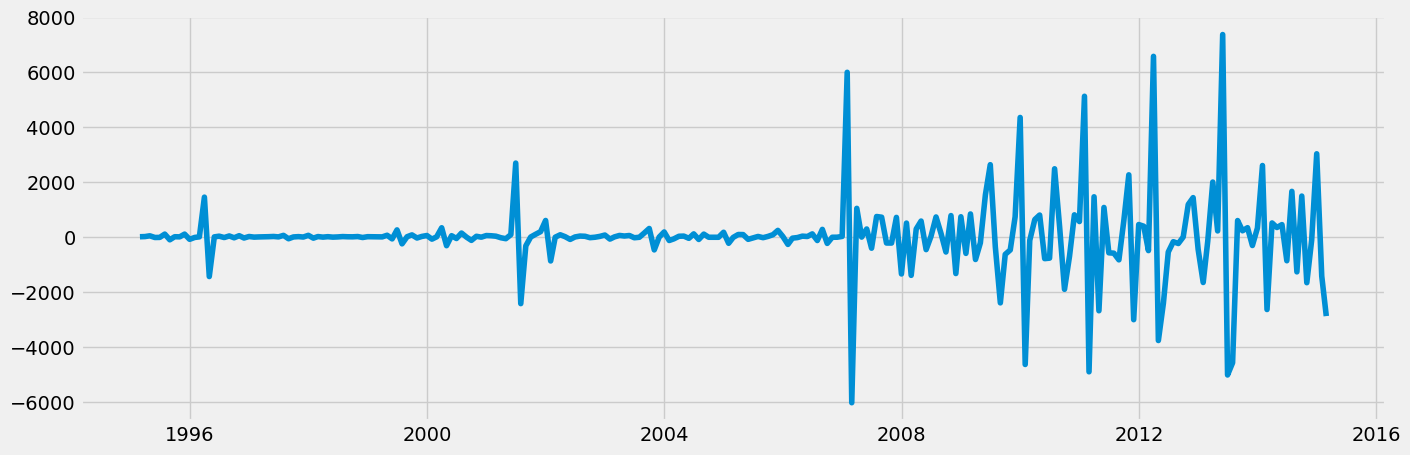

In [143]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [144]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.014699e+01
p-value                        8.136777e-18
Number of Lags Used            1.200000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


#### The results show that the data is now stationary. While the test statistic value (-1.014699e+01) is less than the critical value (5%) of -2.874302e+00, the p-value is much smaller than 0.05 ( 8.136777e-18) . Therefore, the test result is significant and the null hypothesis can be rejected.

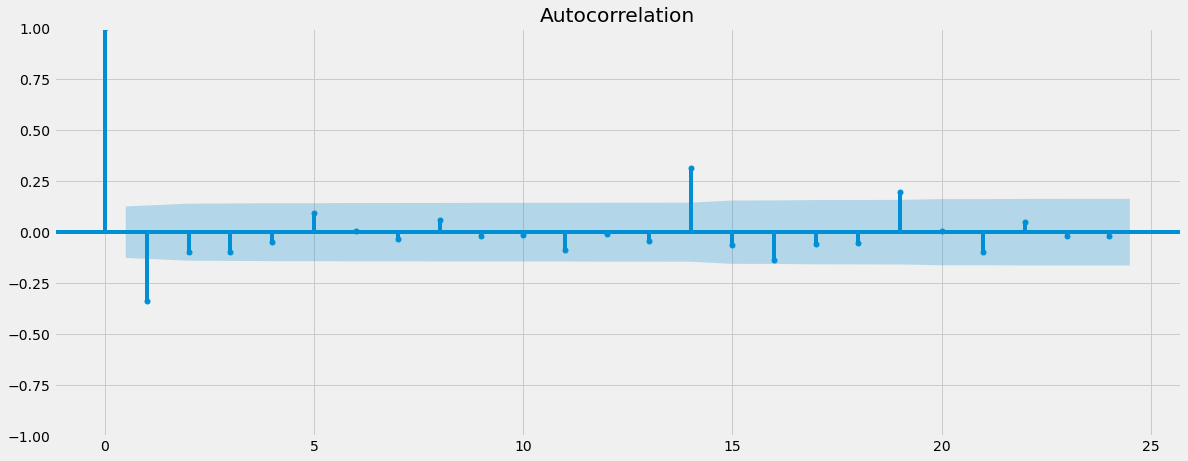

In [145]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

#### The autocorrelation has improved significantly. While there are still a few lines extending outside of the confidence interval, there is not enough (10) to warrent more tests.